In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filepath = "top100.csv"

In [7]:
# Load the csv file
df = pd.read_csv(filepath)
# Extract the year and month from the 'file' column
df[['year', 'month']] = df['file'].str.extract(r'(\d{4})-(\d{2})\.tsv\.gz')

# Convert 'year' and 'month' columns to integers
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

#Filter out urls
df = df[df['url'] != 'Main_Page']
df = df[df['url'] != 'Hyphen-minus']

# Group by year-month and sum the clicks
#mc = df.groupby(['year', 'month']).sum
# overview of df
df.describe


<bound method NDFrame.describe of                                                    file  \
2     hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
3     hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
4     hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
5     hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
6     hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
...                                                 ...   
7195  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
7196  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
7197  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
7198  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   
7199  hdfs://spark-nn.eemcs.utwente.nl/user/s1934538...   

                               url  toClicksLink  toClicksExternal  \
2     Zack_Snyder's_Justice_League        941292           5235473   
3        Meghan,_Duchess_of_Sussex        641245           3719908   
4                     Elizabeth_II       173589

In [8]:
# Calculate total frequency for each URL
url_total_frequency = df.groupby(['url', 'year', 'month']).sum()['toClicks'].reset_index()

# Rank the URLs based on total frequency for each month and year
url_ranking = url_total_frequency.sort_values(['year', 'month', 'toClicks'], ascending=[True, True, False]) \
                                   .groupby(['year', 'month'])['url'].apply(lambda x: x.reset_index(drop=True)).reset_index()

# Add a column for the rank within each group of year and month
url_ranking['rank_within_group'] = url_ranking.groupby(['year', 'month']).cumcount() + 1

# Add a column for the score (100 for the top, decreasing by 1)
url_ranking['score'] = 100 - url_ranking['rank_within_group'] + 1

# Display the result
url_ranking.head()

,year,month,level_2,url,rank_within_group,score
0,2018,1,0,XHamster,1,100
1,2018,1,1,JSON_Web_Token,2,99
2,2018,1,2,HTTP_cookie,3,98
3,2018,1,3,Elizabeth_II,4,97
4,2018,1,4,Royal_Rumble_(2018),5,96


/tmp/ipykernel_410/3631168132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='url', y='score', data=url_scores_top100, palette='viridis')


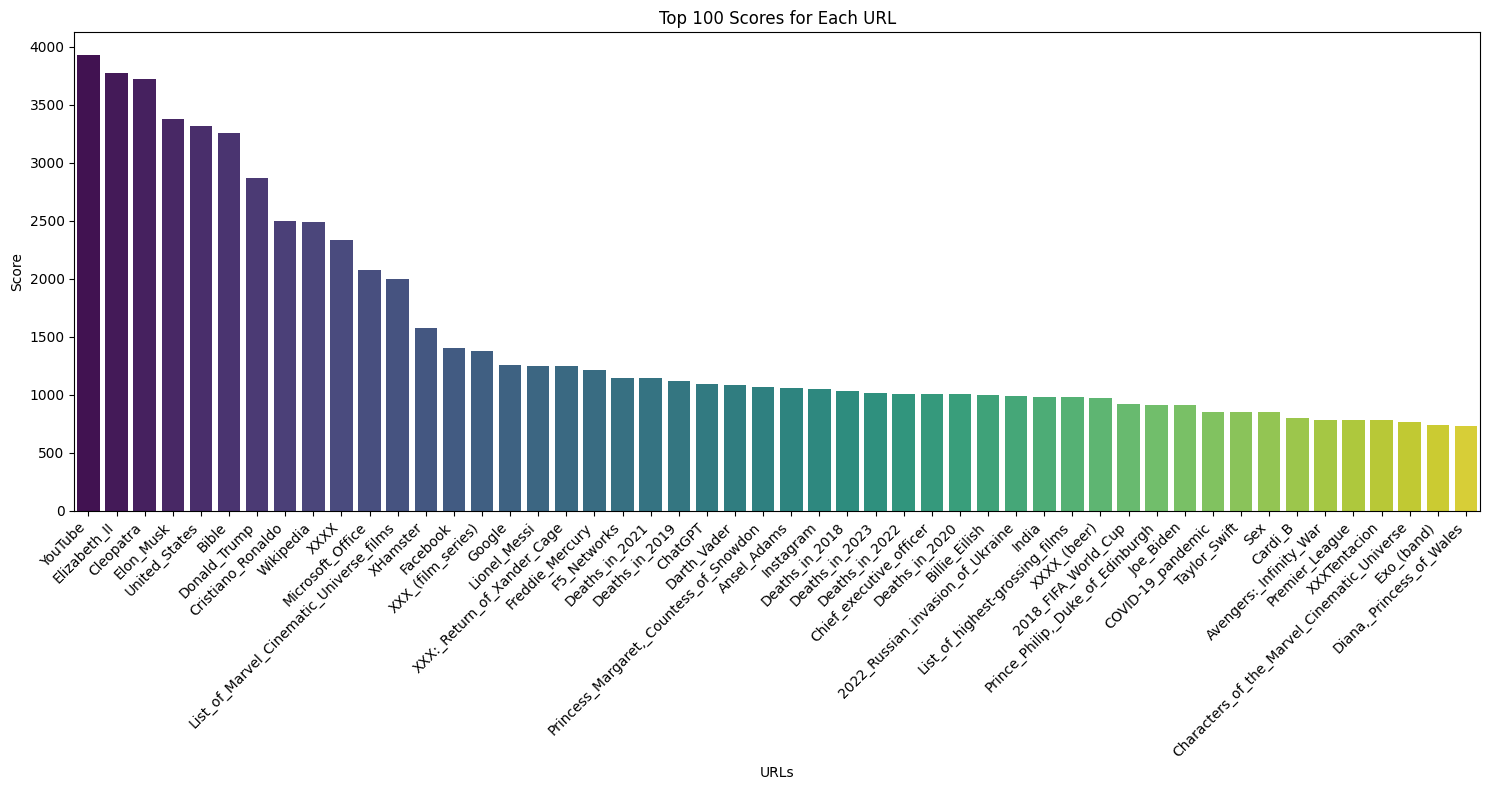

In [11]:
# Group by URL and calculate the sum of scores for each URL
url_scores = url_ranking.groupby('url')['score'].sum().reset_index()

# Sort the DataFrame based on the 'score' column
url_scores_sorted = url_scores.sort_values('score', ascending=False)

# Limit to the top 100 scores
url_scores_top100 = url_scores_sorted.head(50)

# Create a bar plot with URLs on the x-axis and scores on the y-axis
plt.figure(figsize=(15, 8))
sns.barplot(x='url', y='score', data=url_scores_top100, palette='viridis')
plt.title('Top 100 Scores for Each URL')
plt.xlabel('URLs')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Plot the distribution of scores using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(url_scores_sorted['url'], url_scores_sorted['score'], color='skyblue')
plt.title('Scores for Each URL')
plt.xlabel('URLs')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()
